In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = {
    "Round of 64":[210,  210,  220], 
    "Round of 32":[240,  240,  220], 
    "Round of 16":[120,  120,  80], 
    "Elite 8":    [160,  160,  80], 
    "Final 4":    [160,  320,  160], 
    "Final":      [320,  320,  320],
    "Percentile": [92.3, 97.8, 81.3]
}
rows = [
    "SVM",
    "High Seed",
    "No Seed SVM",
]

df = pd.DataFrame(data, index=rows)

df["Total"] = df.iloc[:, :6].sum(1)

## Overall Data

In [3]:
df.sort_values(["Total"], ascending = False)

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final,Percentile,Total
High Seed,210,240,120,160,320,320,97.8,1370
SVM,210,240,120,160,160,320,92.3,1210
No Seed SVM,220,220,80,80,160,320,81.3,1080


## Round Accuracy

Note that this is not exactly the accuracy for later rounds since errors propagate. Thus even if an error was made in a previous round, the model can still get points in later rounds, so while the matchup it originally made the prediction based off was invalid, it was still "correct" in a sense.

In [4]:
accuracy = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]] * 100 / 320
accuracy

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final
SVM,65.625,75.00,37.5,50.0,50.0,100.0
High Seed,65.625,75.00,37.5,50.0,100.0,100.0
No Seed SVM,68.750,68.75,25.0,25.0,50.0,100.0


## Cumulative Scores

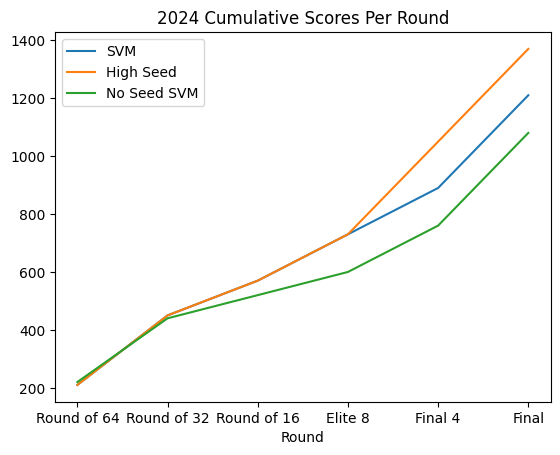

In [5]:
cumulative = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]].cumsum(1)
cumulative = cumulative.transpose()
cumulative.index.name = "Round"
cumulative.plot(title="2024 Cumulative Scores Per Round")
plt.savefig("2024-cumulative-results.png")
plt.show()